# EPSY 5200: Programming for Social Science Researchers
## Week 11: Git Demo
### Wednesday, November 13, 2019

In [4]:
import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [5]:
mov = pd.read_csv('tmdb_5000_movies.csv')

In [6]:
mov.head() # We have lists of dictionaries for every cell.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Challenge 1: Find the descriptive stats for each numeric column

In [7]:
mov.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


Challenge 2: Find which columns have missing data (and how many missing data)

In [16]:
mov.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [17]:
mov_noNA = mov.drop(['homepage', 'tagline'], axis = 1) # axis = 0 is rows, axis = 1 is columns.

In [18]:
mov_noNA.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


In [19]:
sum(mov_noNA.revenue == 0) # missing revenues.

1427

In [20]:
sum(mov_noNA.budget == 0) # missing budgets.

1037

Challenge 3: create mov3, which is only budget > 0 & revenue > 0

In [34]:
mov3 = mov_noNA[(mov_noNA.budget > 0) & (mov_noNA.revenue > 0)]
mov3.shape

(3229, 18)

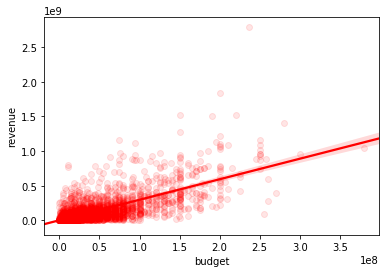

In [68]:
mov_plot = sns.regplot(mov3.budget, mov3.revenue, color = "red", scatter_kws = {'alpha':0.1})
# line is OLS, lm.
# We can also add .getfig() to mov_plot and then do mov_plot.savefig('name.png')
plt.savefig('regression_plot.png')

In [50]:
rev_budg = smf.ols(formula = 'revenue ~ budget', data = mov3).fit() # ordinary least-squares
rev_budg

In [51]:
rev_budg.params 
# Regression model. Intercept not capturing well (money getting back when spending $0).
# Sampling bias. Budget tells us we earn ~$3 for every $1 spent.

Intercept    902540.953296
budget            2.960080
dtype: float64

In [53]:
rev_budg.rsquared_adj

0.49743252567335694

In [54]:
rev_budg.pvalues

Intercept    0.774617
budget       0.000000
dtype: float64

In [57]:
rev_budg.conf_int()

,0,1
Intercept,-5.277035e+06,7.082117e+06
budget,2.857418e+00,3.062742e+00


In [58]:
rev_budg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3196.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:45:12   Log-Likelihood:                -64959.
No. Observations:                3229   AIC:                         1.299e+05
Df Residuals:                    3227   BIC:                         1.299e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.025e+05   3.15e+06      0.286      0.775   -5.28e+06    7.08e+06
budget         2.9601      0.052     56.533      0.000       2.857       3.063
==============================================================================
Omnibus:                     2528.122   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129017.819
Skew:                           3.276   Prob(JB):                         0.00
Kurtosis:                      33.266   Cond. No.                     8.16e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
output = pd.DataFrame({'Estimate': rev_budg.params, 'lowCI': rev_budg.conf_int()[0], 'highCI': rev_budg.conf_int()[1], 'pVal': rev_budg.pvalues})
output

,Estimate,lowCI,highCI,pVal
Intercept,902540.953296,-5.277035e+06,7.082117e+06,0.774617
budget,2.960080,2.857418e+00,3.062742e+00,0.000000


In [61]:
output.to_csv('regression_table.csv')

In [69]:
rbr = smf.ols(formula = 'revenue ~ budget + runtime', data = mov3).fit()
rbr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1632.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:01:24   Log-Likelihood:                -64942.
No. Observations:                3229   AIC:                         1.299e+05
Df Residuals:                    3226   BIC:                         1.299e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -7.01e+07   1.24e+07     -5.630      0.000   -9.45e+07   -4.57e+07
budget         2.8877      0.054     53.959      0.000       2.783       2.993
runtime     6.678e+05   1.13e+05      5.893      0.000    4.46e+05     8.9e+05
==============================================================================
Omnibus:                     2489.798   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123410.029
Skew:                           3.207   Prob(JB):                         0.00
Kurtosis:                      32.599   Cond. No.                     3.24e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

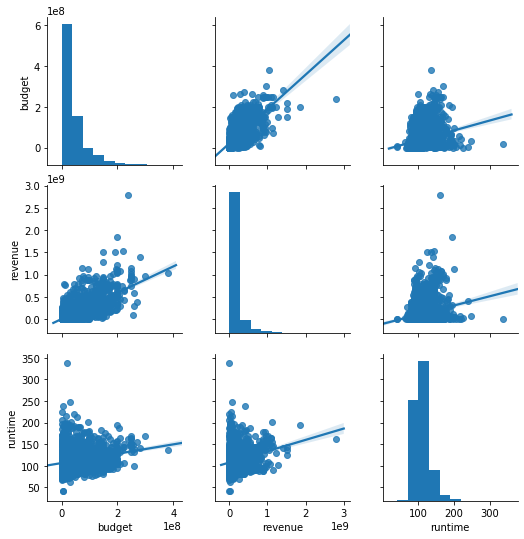

In [72]:
sns.pairplot(mov3[['budget', 'revenue', 'runtime']], kind = 'reg') # all pairwise scatterplots of data we give it.
# multicollinearity between the two can explain why we don't get increased model fit despite both being significant contributors.

In [77]:
mov3[mov3['runtime'] == mov3.runtime.max()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-19,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Carlos,6.7,50
